## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Pressing Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics with CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation is
- a comment placed on a separate line either names the result of the next block of code lines or provides some details only for the next line where a more involved operation is encoded

The code is written by Lydia Novozhilova. Senan Hayes contributed to writing text cells and proofreading, editing, and fruitful discussion of this document.



# Lab7: Implicitization of plane rational curves

## Problem formulation
Make a function that takes a rational parametric equations of an ellipse or hyperbola with two unspecified parameters and does the following:

- Finds the implicit equation of the curve and identifies the conic type
- Gets a pair of parameters that define a degenerate conic and returns its implicit equation
- Gets a pair of parameters that define a nondegenerate conic and plots it

For information related to the general equation of conics read Section 3.3.

The *resultant method* for solving system of polynomial equations used in this lab is not covered in typical undegraduate program for mathematics students. For information related to using the method in this lab read Sections 6.3.1-6.3.4. For more details on the lab refer to Section 6.4.

## Brief description of this JN contents

**Special features:**
- For computer implementation of the lab in this JN, the given rational parametric equations of a curve should be manually converted into  polynomial equations $f(t)=0,\,g(t)=0.$ The coefficients of the two polynomials depend on $x,\,y,$ and two unspecified parameters $a,\,b.$
- This lab implementation includes interaction with the user during execution of the main function.
### Help functions
- help function **get_data** returns lists of coefficients of $f,\,g.$ The lists should be encoded by the user on command lines that start with *fcoef* and *gcoef*.
- help function **syl_matrix** constructs the Sylvester matrix from two lists of coefficints *fcoef, gcoef*. Manual implementation of this construction for two second degree polynomians is detailed in the book and furnished there with examples. The code uses "black box" built-in sympy function **subresultants_qq_zz**. Interested user can find information on this function in Python documentation.
- help function **find_impli_eq** returns the lhs of the implicit equation of the conic with unspecified parameters $a,\,b$ and its symbolic discriminant.

The main function **plot_conic** calls **find_impli_eq** and prints the symbolic discriminant of the curve involving parameters $a,\,b.$ Then the user is asked to input specific values of these parameters. After receiving the user's input, the function prints the implicit equation of the curve and determines if the conic is degenerate or not. For a nondegenerate case, the function renders a graph of the conic. For a degenerate case, it sugests the user to simplify and plot the equation.

In [ ]:
from sympy import *

def get_data():
  """
  Output:
  given by the user lists of coefficients of polynomials f,g in variable
  t in parametric curve equation of the form f(t)=0, g(t)=0.
  The coefficients depend on x,y and parameters a,b.
  """
  a,b,x,y,t = symbols('a b x y t')
  # encode lists of polynomials coefficients (highest power first)
  fcoef =[?,?,?]
  gcoef = [?,?,?]
  return fcoef,gcoef



In [ ]:
# Example
get_data()



In [ ]:
# Sylvester matrix

from sympy.polys import subresultants_qq_zz
def syl_matrix():
  """
  Output:
    Sylvester matrix constructed from the output of function det_data()
  """
  a,b,x,y,t = symbols('a,b,x,y,t')
  A,B = get_data()
  # Making polynomials from coefficients lists
  Apoly=Poly.from_list(A, gens=t)
  Gpoly=Poly.from_list(?, ?) # fill in the blanks
  # Sylvester matrix
  syl_matrix=subresultants_qq_zz.sylvester(Apoly, Gpoly, t)

  return syl_matrix


In [ ]:
# Example
syl_matrix()

In [ ]:
# Implicit equation of a curve and its discriminant

def find_impli_eq():
  """
  Output:
    discriminant of the general equation of curve and
    lhs of the equation
  """
  x,y,a,b = symbols('x y a b')
  elim_t = syl_matrix()
  # determinant of the Sylvester matrix is the lhs of implicit curve equation
  expr = elim_t.det()
  # encode missing coefficients of the second order terms
  A,B,C = [expr.coeff(x**2),expr.coeff(?),expr.coeff(?)]
  # complete encoding of the conic discriminant
  discr = factor(expand(?**2 - 4*?*C)) # discriminant of the conic
  return list([discr,expr])



In [ ]:
# Example

find_impli_eq()[0] #discriminant; find_impli_eq()[1] returns the lhs of implicit curve eq


In [ ]:
# Main function. When asked, the user should input values of parameters a and b

def plot_conic():
  x,y,a,b = symbols("x y a b")
  # discriminant and lhs of implicit equation of conic
  discr,expr = find_impli_eq()
  print('Symbolic discriminant: ',discr)
  # equation of conic
  aval = input("Please input value of a: ")
  bval = input("Please input value of b: ")
  eq_lhs = expr.subs([(a,aval),?]) # encode substitution of bval
  print('Equation of conic: ',eq_lhs,'= 0')

  # conditional plotting
  discr_val = discr.subs([?,?]) # encode substitution of parameters in discriminant
  print('Discriminant value:',discr_val.evalf(3))
  if discr_val != ?: # fill in the gap for case of nondegenerate conic
    ttl = input("Please enter the title (no quotes):")
    # plot with equal ranges of variables
    plot_implicit(Eq(eq_lhs,0),(x,-2,2),(y,-2,2),points=1000,size=(4,3),title=ttl)
  else:
    print("This is a degenerate conic. Simplify the equation and plot it.")



Symbolic discriminant:  -3*(a - b + 1)**2
Please input value of a: 0.5
Please input value of b: 1
Equation of conic:  x**2 - 2.5*x*y + 1.5*x + 1.75*y**2 - 2.0*y + 0.5 = 0
Discriminant value: -0.7500
Please enter the title (no quotes):Ellipse


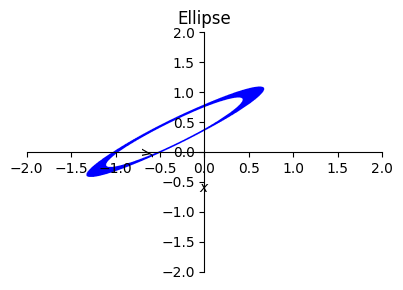

In [ ]:
# Example: Nondegenerate case with equal ranges of variables in the plot
# plot_conic()

In [ ]:
#Same example with adjusted ranges of variables (optional exploration)

def plot_conic1():
  x,y,a,b = symbols('x y a,b')
  discr,expr = find_impli_eq()
  print('Discriminant of the curve: ',discr)
  aval = input("Please input value of a: ")
  bval = input("Please input value of b: ")
  expr_val = expr.subs([(a,?),(b,?)])
  print('Equation of conic: ',?,'= 0')
  # x,y ranges are chosen for the same a, b used in the plot above this cell
  plot_implicit(Eq(eq,0),(x,-1.3,0.6),(y,-0.4,1.1),points=1000,size=(3,2),title='Conic')

Discriminant of the curve:  -3*(a - b + 1)**2
Please input value of a: 0.5
Please input value of b: 1
Equation of conic:  x**2 - 2.5*x*y + 1.5*x + 1.75*y**2 - 2.0*y + 0.5 = 0


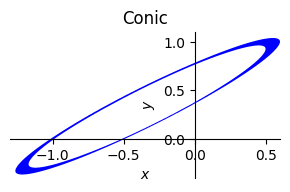

In [ ]:
# Example
plot_conic1()

In [ ]:
# Example: Degenerate case. Left-hand side of the equation can be factored. The
# result shows that the equation defines a line.
plot_conic()

Symbolic discriminant:  -3*(a - b + 1)**2
Please input value of a: 1
Please input value of b: 2
Equation of conic:  3*x**2 - 6*x*y + 6*x + 3*y**2 - 6*y + 3 = 0
Discriminant value: 0
This is a degenerate conic. Simplify the equation and plot it.
